# Variables categóricas o cualitativas

In [1]:
from IPython.display import Image

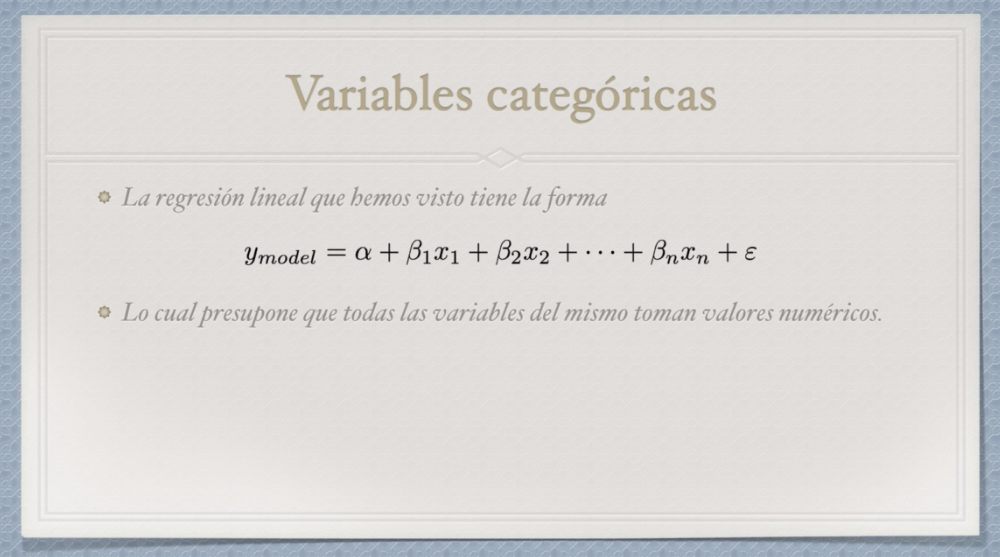

In [2]:
Image(filename="resources/variables_categoricas.png")

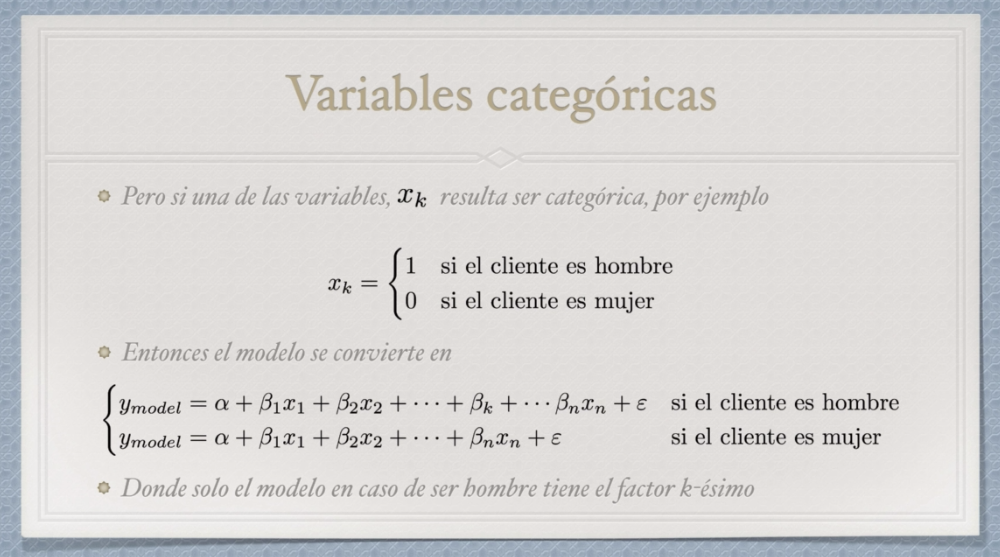

In [3]:
Image(filename="resources/variables_categoricas2.png")

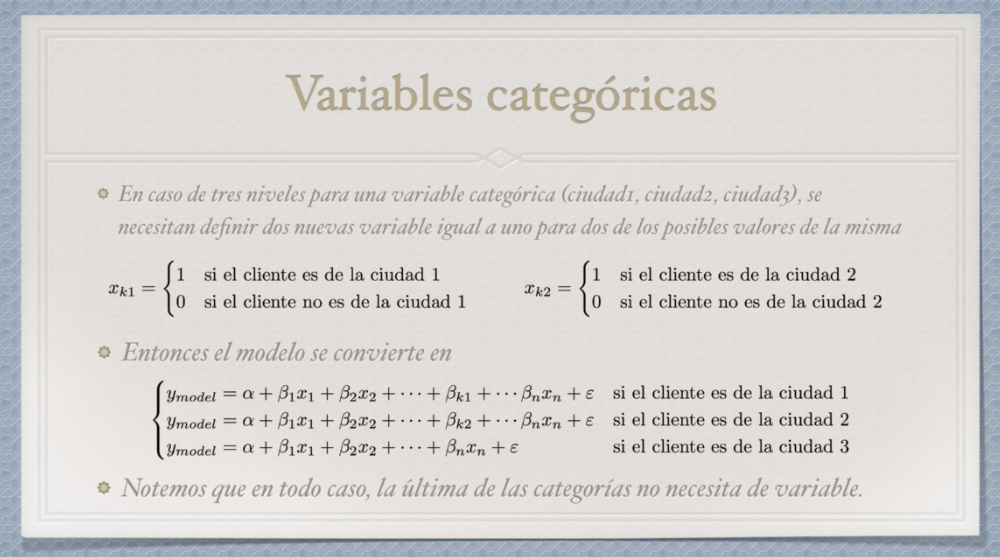

In [4]:
Image(filename="resources/variables_categoricas3.png")

Siempre hay una variable menos que el conjunto de categorías que tenemos.

# El tratamiento de las variables categóricas

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [7]:
df = pd.read_csv("../datasets/ecom-expense/Ecom Expense.csv")
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


Tenemos 2 variables de categoría, Gender y City Tier

In [9]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix = "City")

In [10]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [11]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [13]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [15]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [16]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [24]:
feature_cols = ["Monthly Income", "Transaction Time", 
                "Gender_Female", "Gender_Male", 
                "City_Tier 1", "City_Tier 2", "City_Tier 3",
               "Record"]

In [25]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [28]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print(lm.intercept_)
print(lm.coef_)

-79.4171303013718
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [30]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589634),
 ('Gender_Female', -131.02501325554624),
 ('Gender_Male', 131.02501325554607),
 ('City_Tier 1', 76.76432601049513),
 ('City_Tier 2', 55.1389743092325),
 ('City_Tier 3', -131.9033003197277),
 ('Record', 772.2334457445645)]

In [31]:
lm.score(X,Y) # para saber el factor de R^2

0.9179923586131016

No parece un modelo muy fiable (modelo inicial tiene las siguientes variables --> "Monthly Income", "Transaction Time", "Gender_Female", "Gender_Male", "City_Tier 1", "City_Tier 2", "City_Tier 3"). 

Añadiremos alguna variable más para ver si mejora.
Añadiendo la variable Record, el modelo mejora mucho.

El modelo puede ser escrito como:

* Total_Spend = -79.4*171303013718 + 'Monthly Income'*0.14753898049205738 + 'Transaction Time'* 0.15494612549589634 + 'Gender_Female'* -131.02501325554624 + 'Gender_Male'*131.02501325554607 + 'City_Tier 1'* 76.76432601049513 + 'City_Tier 2' * 55.1389743092325 + 'City_Tier 3' * -131.9033003197277 + 'Record' * 772.2334457445645
    
    * Si es hombre y vive en CT1 (el modelo se simplifica): Total_Spend = -79.4*171303013718 + 'Monthly Income'*0.14753898049205738 + 'Transaction Time'* 0.15494612549589634 + 131.02501325554607 + 76.76432601049513 + 'Record'*772.2334457445645
    * Si es hombre y vive en CT2 (el modelo se simplifica): Total_Spend = -79.4*171303013718 + 'Monthly Income'*0.14753898049205738 + 'Transaction Time'* 0.15494612549589634 + 131.02501325554607 + 55.1389743092325 + 'Record'*772.2334457445645
    * Si es hombre y vive en CT3 (el modelo se simplifica): Total_Spend = -79.4*171303013718 + 'Monthly Income'*0.14753898049205738 + 'Transaction Time'* 0.15494612549589634 + 131.02501325554607 -131.9033003197277 + 'Record'*772.2334457445645
    * Si es mujer y vive en CT1 (el modelo se simplifica): Total_Spend = -79.4*171303013718 + 'Monthly Income'*0.14753898049205738 + 'Transaction Time'* 0.15494612549589634 - 131.02501325554607 + 76.76432601049513 + 'Record'*772.2334457445645
    * Si es mujer y vive en CT2 (el modelo se simplifica): Total_Spend = -79.4*171303013718 + 'Monthly Income'*0.14753898049205738 + 'Transaction Time'* 0.15494612549589634 - 131.02501325554607 + 55.1389743092325 + 'Record'*772.2334457445645
    * Si es mujer y vive en CT3 (el modelo se simplifica): Total_Spend = -79.4*171303013718 + 'Monthly Income'*0.14753898049205738 + 'Transaction Time'* 0.15494612549589634 - 131.02501325554607 - 131.9033003197277 + 'Record'*772.2334457445645

In [33]:
df_new["prediction"] = -79.4171303013718 + df_new['Monthly Income'] * 0.14753898049205738 + df_new['Transaction Time']* 0.15494612549589634 + df_new['Gender_Female']* (-131.02501325554624) + df_new['Gender_Male']*131.02501325554607 + df_new['City_Tier 1']* 76.76432601049513 + df_new['City_Tier 2'] * 55.1389743092325 + df_new['City_Tier 3'] * (-131.9033003197277)+ df_new['Record'] * 772.2334457445645

In [34]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [41]:
SSD = np.sum((df_new["prediction"] - df_new["Total Spend"])**2)
SSD

1517733985.340816

In [42]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))
RSE

803.1318809818165

In [43]:
sales_mean = np.mean(df_new["Total Spend"])
sales_mean

6163.176415976714

In [45]:
error = RSE/sales_mean
error # error del 13%

0.13031135680294162

## Otra forma más simple de calcular las predicciones

Otra posible forma de hacer el cálculo de las predicciones podría ser usando la función predict del modelo lineal y añadiéndolo como columna adicional al data frame:

``` df_new["prediction"]=lm.predict(pd.DataFrame(df_new[feature_cols]) ```
